### 1.4.9 Contours in OpenCV

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [4]:
img = cv2.imread('opencv.png')
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
imgray = 255-imgray

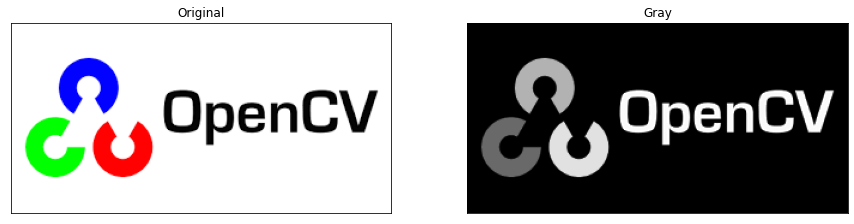

In [5]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imgray,cmap = 'gray')
plt.title('Gray'), plt.xticks([]), plt.yticks([])
plt.show()

In [9]:
ret,thresh = cv2.threshold(imgray,8,255,cv2.THRESH_BINARY)

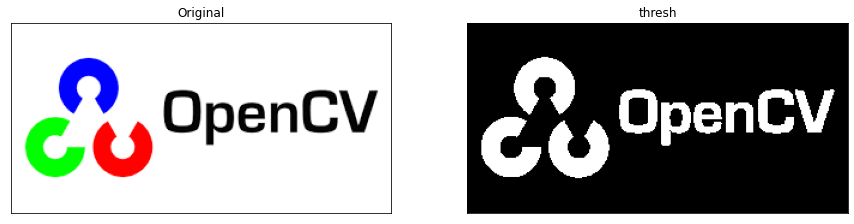

In [10]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(thresh,cmap = 'gray')
plt.title('thresh'), plt.xticks([]), plt.yticks([])
plt.show()

In [12]:
kernel = np.ones((5,5), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

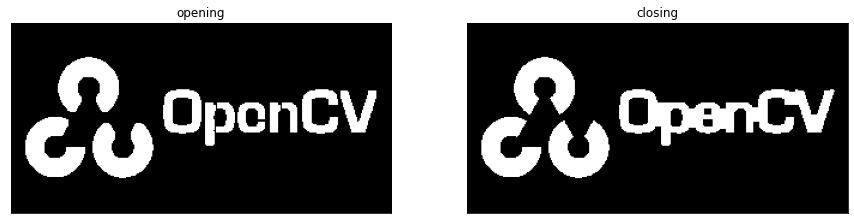

In [13]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(opening,cmap = 'gray')
plt.title('opening'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(closing,cmap = 'gray')
plt.title('closing'), plt.xticks([]), plt.yticks([])
plt.show()

In [14]:
contours, hierarchy = cv2.findContours(closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [16]:
imgcontour = cv2.drawContours(img, contours, -1, (255,32,32), 2)
img = cv2.imread('opencv.png')

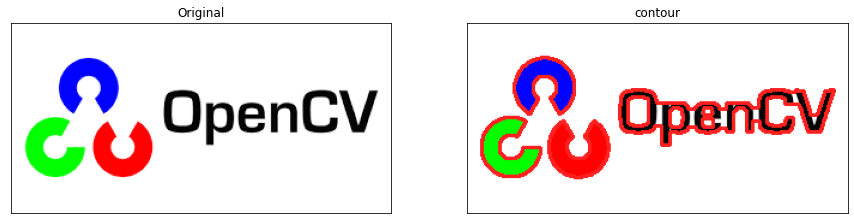

In [17]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imgcontour,cmap = 'gray')
plt.title('contour'), plt.xticks([]), plt.yticks([])
plt.show()

In [29]:
cnt = contours[7]
epsilon = 0.01*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)

In [30]:
imgcontour = cv2.imread('opencv.png')
imgcontour = cv2.drawContours(imgcontour, [cnt], -1, (255,32,255), 3)
imgapprox = cv2.imread('opencv.png')
imgapprox = cv2.drawContours(imgapprox, [approx], -1, (255,32,255), 3)
img = cv2.imread('opencv.png')

In [31]:
cnt.shape, approx.shape

((105, 1, 2), (18, 1, 2))

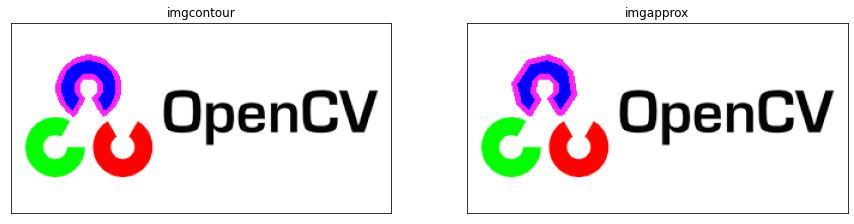

In [32]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(imgcontour)
plt.title('imgcontour'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imgapprox,cmap = 'gray')
plt.title('imgapprox'), plt.xticks([]), plt.yticks([])
plt.show()

In [33]:
hull = cv2.convexHull(approx)

In [36]:
imghull = cv2.imread('opencv.png')
imghull = cv2.drawContours(imghull, [hull], -1, (255,32,255), 3)

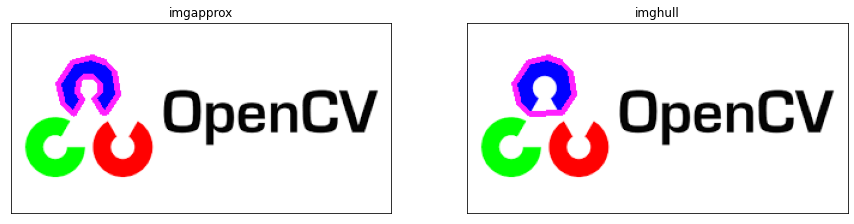

In [37]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(imgapprox)
plt.title('imgapprox'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imghull,cmap = 'gray')
plt.title('imghull'), plt.xticks([]), plt.yticks([])
plt.show()

In [40]:
x,y,w,h = cv2.boundingRect(cnt)
imgbox = cv2.imread('opencv.png')
imgbox = cv2.rectangle(imgbox,(x,y),(x+w,y+h),(255,0,0),2)

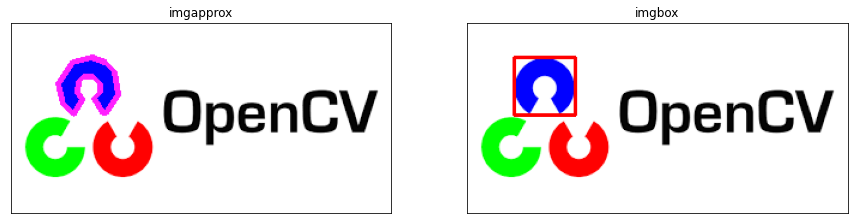

In [41]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(imgapprox)
plt.title('imgapprox'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imgbox,cmap = 'gray')
plt.title('imgbox'), plt.xticks([]), plt.yticks([])
plt.show()

In [42]:
imgcontour = cv2.imread('opencv.png')
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
imgcontour = cv2.drawContours(imgcontour,[box],0,(0,0,255),2)

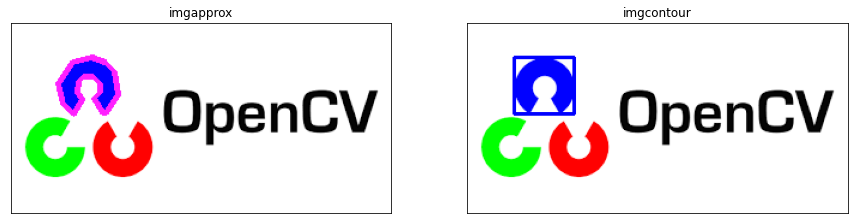

In [43]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(imgapprox)
plt.title('imgapprox'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imgcontour,cmap = 'gray')
plt.title('imgcontour'), plt.xticks([]), plt.yticks([])
plt.show()

In [46]:
cnt = contours[7]
M = cv2.moments(cnt)
print(M)

{'m00': 1388.5, 'm10': 89246.33333333333, 'm01': 70622.0, 'm20': 6027810.25, 'm11': 4538001.791666666, 'm02': 3784210.583333333, 'm30': 424916726.20000005, 'm21': 307289372.15, 'm12': 243116116.31666666, 'm03': 212343413.70000002, 'mu20': 291470.3051354382, 'mu11': -1252.477448686026, 'mu02': 192228.67191813653, 'mu30': 8353.957036614418, 'mu21': 863403.5250491723, 'mu12': 12036.95121316798, 'mu03': 316286.3304847777, 'nu20': 0.1511828567292436, 'nu11': -0.0006496480613808012, 'nu02': 0.09970717172148376, 'nu30': 0.00011628602550644992, 'nu21': 0.012018467882487019, 'nu12': 0.00016755283869183135, 'nu03': 0.0044026657227099995}


In [47]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

In [48]:
area = cv2.contourArea(cnt)

In [49]:
perimeter = cv2.arcLength(cnt,True)

In [52]:
imginfo = cv2.imread('opencv.png')
imginfo = cv2.circle(imginfo,(cx,cy), 5, (0,0,255), -1)
font = cv2.FONT_HERSHEY_SIMPLEX
msg = "A"+str(area)+"L"+str(perimeter)
imginfo=cv2.putText(imginfo,msg,(cx,cy), font, 1,(32,32,32),2,cv2.LINE_AA)

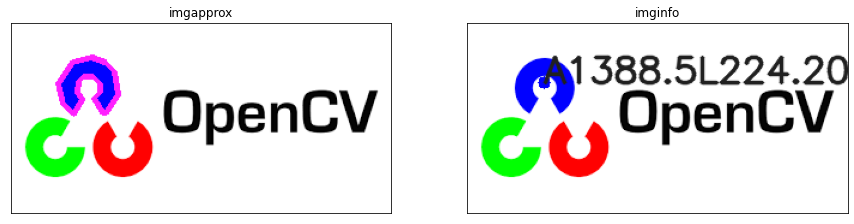

In [53]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(imgapprox)
plt.title('imgapprox'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imginfo,cmap = 'gray')
plt.title('imginfo'), plt.xticks([]), plt.yticks([])
plt.show()